# House Loan Data Analysis

##### Description

For safe and secure lending experience, it's important to analyze the past data. In this project, you have to build a deep learning model to predict the chance of default for future loans using the historical data. As you will see, this dataset is highly imbalanced and includes a lot of features that make this problem more challenging.

Objective: Create a model that predicts whether or not an applicant will be able to repay a loan using historical data.

Domain: Finance

Analysis to be done: Perform data preprocessing and build a deep learning prediction model.

Steps to be done:

⦁    Load the dataset that is given to you
⦁    Check for null values in the dataset
⦁    Print percentage of default to payer of the dataset for the TARGET column
⦁    Balance the dataset if the data is imbalanced
⦁    Plot the balanced data or imbalanced data
⦁    Encode the columns that is required for the model
⦁    Calculate Sensitivity as a metrice
⦁    Calculate area under receiver operating characteristics curve

In [66]:
import pandas as pd
import numpy  as np
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import roc_curve
from sklearn.preprocessing    import LabelEncoder
from sklearn.impute           import SimpleImputer
from sklearn.preprocessing    import StandardScaler
from sklearn.model_selection  import train_test_split
from sklearn.metrics          import accuracy_score
from imblearn.over_sampling   import SMOTE
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score ,classification_report, confusion_matrix
# ANN Modules
import keras
from keras.models      import Sequential
from keras.layers      import Dense, Dropout
from tensorflow.keras.optimizers import RMSprop,Adam

1. Load the dataset that is given to you

In [4]:
df=pd.read_csv("/content/drive/MyDrive/data_project_folder/loan_data_project.csv")
df= df.drop(['SK_ID_CURR'],axis=1)
df.head()

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
df = df[pd.notnull(df['EMERGENCYSTATE_MODE'])]
#EMERGENCYSTATE_MODE--> this column contains around 145755 of missing values in it

In [6]:
df.shape

(161756, 121)

In [7]:
df = df.loc[df['CODE_GENDER'] != 'XNA']

In [8]:
df['NAME_TYPE_SUITE'] = df['NAME_TYPE_SUITE'].replace(np.nan,'Other_C')
df['NAME_FAMILY_STATUS'] = df['NAME_FAMILY_STATUS'].replace('Unknown', 'Married')
df['OCCUPATION_TYPE'] = df['OCCUPATION_TYPE'].replace(np.nan,'Others')
df['WALLSMATERIAL_MODE'] = df['WALLSMATERIAL_MODE'].replace(np.nan,'Others')
df['HOUSETYPE_MODE'] = df['HOUSETYPE_MODE'].replace(np.nan,'Unkown')
df['FONDKAPREMONT_MODE'] = df['FONDKAPREMONT_MODE'].replace(np.nan,'not available')

In [9]:
df = df[pd.notnull(df['AMT_REQ_CREDIT_BUREAU_YEAR'])]

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 141359 entries, 0 to 307510
Columns: 121 entries, TARGET to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(40), object(16)
memory usage: 131.6+ MB


2. Encode the columns that is required for the model
### Lable encoding

In [11]:
labels = df.describe(include=['object']).columns.values
labels

array(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR',
       'FLAG_OWN_REALTY', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE',
       'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'OCCUPATION_TYPE', 'WEEKDAY_APPR_PROCESS_START',
       'ORGANIZATION_TYPE', 'FONDKAPREMONT_MODE', 'HOUSETYPE_MODE',
       'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE'], dtype=object)

In [12]:
le = LabelEncoder()
for lab in labels:
    le.fit(df[lab].values)
    df[lab] = le.transform(df[lab])
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 141359 entries, 0 to 307510
Columns: 121 entries, TARGET to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(56)
memory usage: 131.6 MB


3. Check for null values in the dataset

In [13]:
null_column = df.columns[df.isnull().any()]
print('Percentage of nan values :       %')
print()
print(df[null_column].isnull().sum()/df.shape[0]*100)

Percentage of nan values :       %

AMT_ANNUITY                      0.003537
AMT_GOODS_PRICE                  0.076401
OWN_CAR_AGE                     66.835504
CNT_FAM_MEMBERS                  0.000707
EXT_SOURCE_1                    53.918746
EXT_SOURCE_2                     0.181099
EXT_SOURCE_3                     7.437093
APARTMENTS_AVG                   6.336349
BASEMENTAREA_AVG                21.041462
YEARS_BEGINEXPLUATATION_AVG      2.606130
YEARS_BUILD_AVG                 36.207104
COMMONAREA_AVG                  42.638955
ELEVATORS_AVG                   11.141137
ENTRANCES_AVG                    5.554652
FLOORSMAX_AVG                    4.435515
FLOORSMIN_AVG                   38.816771
LANDAREA_AVG                    22.631739
LIVINGAPARTMENTS_AVG            39.747734
LIVINGAREA_AVG                   5.292199
NONLIVINGAPARTMENTS_AVG         41.785100
NONLIVINGAREA_AVG               14.723505
APARTMENTS_MODE                  6.336349
BASEMENTAREA_MODE               21.04146

In [14]:
df = df.drop(['EXT_SOURCE_1','OWN_CAR_AGE','COMMONAREA_AVG','FLOORSMIN_AVG','LIVINGAPARTMENTS_AVG','COMMONAREA_MODE','NONLIVINGAPARTMENTS_AVG','FLOORSMIN_MODE','LIVINGAPARTMENTS_MODE','NONLIVINGAPARTMENTS_MODE','COMMONAREA_MEDI','FLOORSMIN_MEDI','LIVINGAPARTMENTS_MEDI','NONLIVINGAPARTMENTS_MEDI'], axis=1)

#since these columns contains more tham 39% of nan values

In [15]:
df.shape

(141359, 107)

In [16]:
df = df[pd.notnull(df['AMT_ANNUITY'])]

### Imputing the missing values

In [17]:
imp1 = SimpleImputer(missing_values= np.nan, strategy='mean')
imp2 = SimpleImputer(missing_values= np.nan, strategy='median')

In [18]:
df[['AMT_GOODS_PRICE','EXT_SOURCE_2',
    'EXT_SOURCE_3','APARTMENTS_AVG',
    'BASEMENTAREA_AVG','YEARS_BEGINEXPLUATATION_AVG',
    'YEARS_BUILD_AVG','ELEVATORS_AVG',
    'ENTRANCES_AVG','FLOORSMAX_AVG',
    'LANDAREA_AVG','LIVINGAREA_AVG',
    'NONLIVINGAREA_AVG','APARTMENTS_MODE',
    'BASEMENTAREA_MODE','YEARS_BEGINEXPLUATATION_MODE',
    'YEARS_BUILD_MODE','ELEVATORS_MODE','ENTRANCES_MODE',
    'FLOORSMAX_MODE','LANDAREA_MODE','LIVINGAREA_MODE',
    'NONLIVINGAREA_MODE','APARTMENTS_MEDI',
    'BASEMENTAREA_MEDI','BASEMENTAREA_MEDI',
    'YEARS_BEGINEXPLUATATION_MEDI','YEARS_BUILD_MEDI',
    'ELEVATORS_MEDI','ENTRANCES_MEDI','FLOORSMAX_MEDI',
    'LANDAREA_MEDI','LIVINGAREA_MEDI',
    'NONLIVINGAREA_MEDI','TOTALAREA_MODE',]]             = imp1.fit_transform(df[['AMT_GOODS_PRICE','EXT_SOURCE_2',
                                                                                  'EXT_SOURCE_3','APARTMENTS_AVG',
                                                                                  'BASEMENTAREA_AVG','YEARS_BEGINEXPLUATATION_AVG',
                                                                                  'YEARS_BUILD_AVG','ELEVATORS_AVG',
                                                                                  'ENTRANCES_AVG','FLOORSMAX_AVG',
                                                                                  'LANDAREA_AVG','LIVINGAREA_AVG',
                                                                                  'NONLIVINGAREA_AVG','APARTMENTS_MODE',
                                                                                  'BASEMENTAREA_MODE','YEARS_BEGINEXPLUATATION_MODE',
                                                                                  'YEARS_BUILD_MODE','ELEVATORS_MODE','ENTRANCES_MODE',
                                                                                  'FLOORSMAX_MODE','LANDAREA_MODE','LIVINGAREA_MODE',
                                                                                  'NONLIVINGAREA_MODE','APARTMENTS_MEDI',
                                                                                  'BASEMENTAREA_MEDI','BASEMENTAREA_MEDI',
                                                                                  'YEARS_BEGINEXPLUATATION_MEDI','YEARS_BUILD_MEDI',
                                                                                  'ELEVATORS_MEDI','ENTRANCES_MEDI','FLOORSMAX_MEDI',
                                                                                  'LANDAREA_MEDI','LIVINGAREA_MEDI',
                                                                                  'NONLIVINGAREA_MEDI','TOTALAREA_MODE',]]  )

In [19]:
df[['CNT_FAM_MEMBERS','OBS_30_CNT_SOCIAL_CIRCLE',
    'DEF_30_CNT_SOCIAL_CIRCLE','OBS_60_CNT_SOCIAL_CIRCLE',
    'OBS_60_CNT_SOCIAL_CIRCLE','DEF_60_CNT_SOCIAL_CIRCLE',]] = imp2.fit_transform(df[['CNT_FAM_MEMBERS','OBS_30_CNT_SOCIAL_CIRCLE',
                                                                                      'DEF_30_CNT_SOCIAL_CIRCLE','OBS_60_CNT_SOCIAL_CIRCLE',
                                                                                      'OBS_60_CNT_SOCIAL_CIRCLE','DEF_60_CNT_SOCIAL_CIRCLE',]])

In [20]:
null_columns=df.columns[df.isnull().any()]
print('Percentage of nan values :       %')
print()
print(df[null_columns].isnull().sum()/df.shape[0]*100)

Percentage of nan values :       %

Series([], dtype: float64)


### Finding column with zero variance

In [21]:
var = df.var()[df.var()==0].index.values
print(var)

['FLAG_MOBIL' 'FLAG_DOCUMENT_2']


In [22]:
df = df.drop(['FLAG_DOCUMENT_2','FLAG_MOBIL'],axis=1)

#since this column contains only one categorical variable, ie zero variance

In [23]:
class_counts = df.TARGET.value_counts()

print('Counts of Class 0 :',class_counts[0])
print('Counts of Class 1 :',class_counts[1])
print()
print('Propotion ---> ',round(class_counts[0]/len(df.TARGET)*100),':',round(class_counts[1]/len(df.TARGET)*100))

Counts of Class 0 : 131840
Counts of Class 1 : 9514

Propotion --->  93 : 7


In [24]:
sc = StandardScaler()
df[['AMT_INCOME_TOTAL','AMT_ANNUITY',
   'AMT_CREDIT','AMT_GOODS_PRICE',
   'DAYS_BIRTH','DAYS_EMPLOYED',
   'DAYS_REGISTRATION','DAYS_ID_PUBLISH',
   'DAYS_LAST_PHONE_CHANGE']]              = sc.fit_transform(df[['AMT_INCOME_TOTAL','AMT_ANNUITY',
                                                                  'AMT_CREDIT','AMT_GOODS_PRICE',
                                                                  'DAYS_BIRTH','DAYS_EMPLOYED',
                                                                  'DAYS_REGISTRATION','DAYS_ID_PUBLISH',
                                                                  'DAYS_LAST_PHONE_CHANGE']])

4. Print percentage of default to payer of the dataset for the TARGET column

In [60]:
defaulters=(df.TARGET==1).sum()
payers=(df.TARGET==0).sum()
percentage_of_default_payer= (defaulters/payers)*100
print("% of default to payer: ", percentage_of_default_payer)

% of default to payer:  7.216322815533981


### Finding the highly correlated columns in dataset

In [25]:
corr = df.corr()

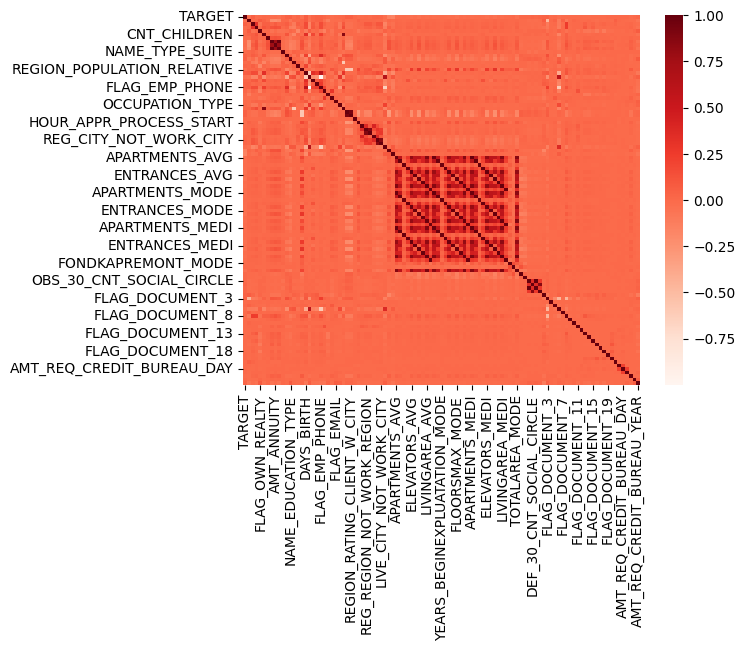

In [26]:
import seaborn as sns
sns.heatmap(corr, annot=False, cmap=plt.cm.Reds)
plt.show()

In [27]:
corr_matrix = df.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape),k=1).astype(np.bool_))
to_drop = [col for col in upper.columns if any(upper[col]>0.90)]
to_drop

['AMT_GOODS_PRICE',
 'FLAG_EMP_PHONE',
 'REGION_RATING_CLIENT_W_CITY',
 'APARTMENTS_MODE',
 'BASEMENTAREA_MODE',
 'YEARS_BEGINEXPLUATATION_MODE',
 'YEARS_BUILD_MODE',
 'ELEVATORS_MODE',
 'ENTRANCES_MODE',
 'FLOORSMAX_MODE',
 'LANDAREA_MODE',
 'LIVINGAREA_MODE',
 'NONLIVINGAREA_MODE',
 'APARTMENTS_MEDI',
 'BASEMENTAREA_MEDI',
 'YEARS_BEGINEXPLUATATION_MEDI',
 'YEARS_BUILD_MEDI',
 'ELEVATORS_MEDI',
 'ENTRANCES_MEDI',
 'FLOORSMAX_MEDI',
 'LANDAREA_MEDI',
 'LIVINGAREA_MEDI',
 'NONLIVINGAREA_MEDI',
 'TOTALAREA_MODE',
 'OBS_60_CNT_SOCIAL_CIRCLE']

In [28]:
df = df.drop(df[to_drop], axis=1)

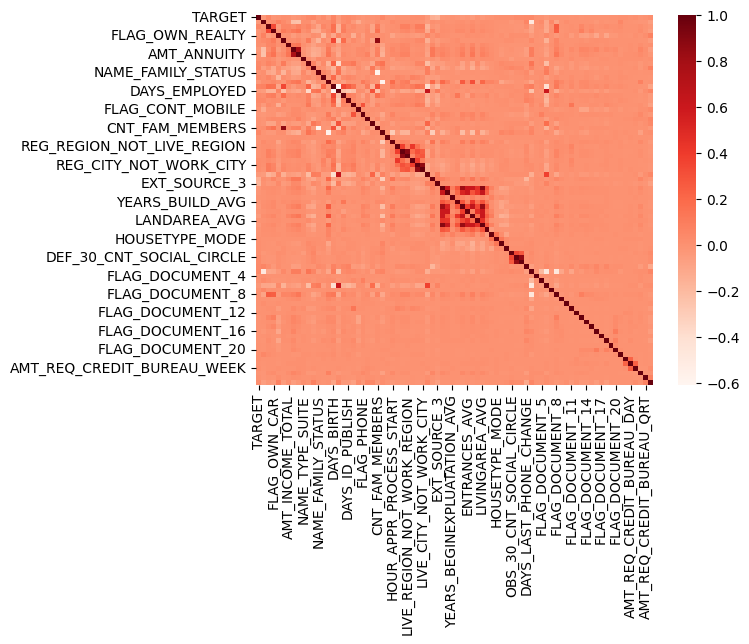

In [29]:
corr = df.corr()
sns.heatmap(corr, annot=False, cmap=plt.cm.Reds)
plt.show()

### Splitting data in Hold out method

In [30]:
x = df.drop('TARGET',axis=1)
y = df.TARGET

In [31]:
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size= 0.2, random_state= 10, stratify=y)
print(x_train.shape)
print(y_train.shape)
print()
print(y_train.value_counts())

(113083, 79)
(113083,)

TARGET
0    105472
1      7611
Name: count, dtype: int64


 5. Plot the balanced data or imbalanced data

TARGET
0    131840
1      9514
Name: count, dtype: int64


Text(0.5, 1.0, 'Imbalanced Data')

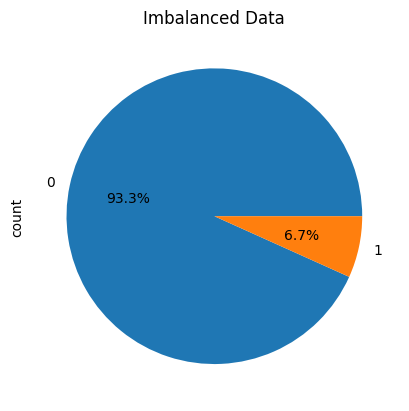

In [63]:
print(y.value_counts())
y.value_counts().plot(kind="pie",autopct="%1.1f%%")
plt.title("Imbalanced Data")

In [32]:
smt = SMOTE(random_state= 10, n_jobs=-1,sampling_strategy='all' )
#sampling_strategy='minority' ----> resample only the minority class;
#sampling_strategy='not minority' ----> resample all classes but the minority class;
#sampling_strategy='not majority' ----> resample all classes but the majority class;
#sampling_strategy='all' ----> resample all classes;
#sampling_strategy='auto' ----> equivalent to 'not majority'.

In [64]:
x_train, y_train = smt.fit_resample(x_train,y_train)

In [34]:
print(x_train.shape)
print(y_train.shape)

(210944, 79)
(210944,)


TARGET
0    105472
1    105472
Name: count, dtype: int64


Text(0.5, 1.0, 'Balanced Data')

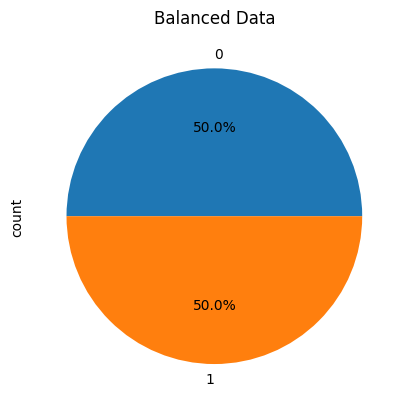

In [65]:
print(y_train.value_counts())
y_train.value_counts().plot(kind="pie",autopct="%1.1f%%")
plt.title("Balanced Data")

### Building NN model

In [35]:
model = Sequential()
model.add(Dense(units= 53,activation = 'relu',input_dim=79)) # first hidden and first input layer
model.add(Dropout(0.2))
model.add(Dense(units= 53,activation = 'relu')) # second hidden layer
model.add(Dropout(0.2))
model.add(Dense(units= 1,activation = 'sigmoid')) # output layer
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 53)                4240      
                                                                 
 dropout (Dropout)           (None, 53)                0         
                                                                 
 dense_1 (Dense)             (None, 53)                2862      
                                                                 
 dropout_1 (Dropout)         (None, 53)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 54        
                                                                 
Total params: 7156 (27.95 KB)
Trainable params: 7156 (27.95 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [36]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [44]:
history= model.fit(x_train,y_train,batch_size=10,epochs=5,validation_data=(x_test,y_test))

Epoch 1/5
21095/21095 [==============================] - 60s 3ms/step - loss: 0.3233 - accuracy: 0.8622 - val_loss: 0.3927 - val_accuracy: 0.8405
Epoch 2/5
21095/21095 [==============================] - 57s 3ms/step - loss: 0.3227 - accuracy: 0.8628 - val_loss: 0.3415 - val_accuracy: 0.8679
Epoch 3/5
21095/21095 [==============================] - 56s 3ms/step - loss: 0.3228 - accuracy: 0.8629 - val_loss: 0.3726 - val_accuracy: 0.8553
Epoch 4/5
21095/21095 [==============================] - 56s 3ms/step - loss: 0.3236 - accuracy: 0.8624 - val_loss: 0.3628 - val_accuracy: 0.8632
Epoch 5/5
21095/21095 [==============================] - 53s 3ms/step - loss: 0.3207 - accuracy: 0.8620 - val_loss: 0.3431 - val_accuracy: 0.8701


In [45]:
score = model.evaluate(x_test,y_test)

884/884 [==============================] - 1s 2ms/step - loss: 0.3431 - accuracy: 0.8701


In [46]:
print('Test loss : ', score[0])
print('Test accuracy : ', score[1])

Test loss :  0.34306642413139343
Test accuracy :  0.870114266872406


In [47]:
y_pred_train=model.predict(x_train)
y_test_train=model.predict(x_test)

884/884 [==============================] - 1s 1ms/step


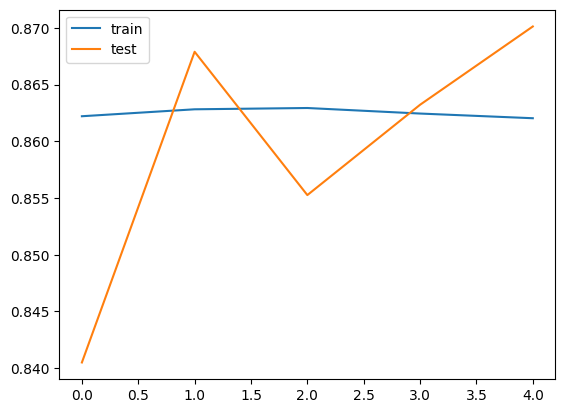

In [48]:
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show()

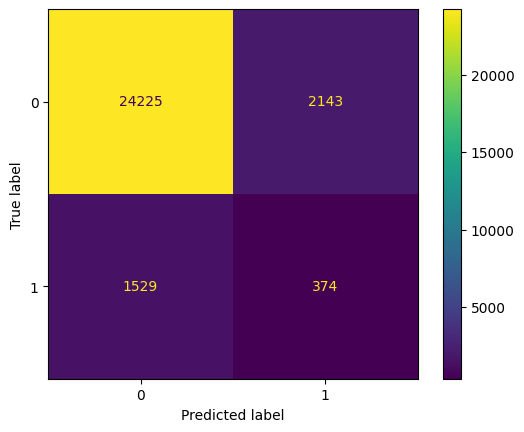

In [55]:
conmat=confusion_matrix(y_test,pred)
disp=ConfusionMatrixDisplay(confusion_matrix=conmat)
disp.plot()

7. Calculate Sensitivity as a metrice.

In [56]:
print("Accuracy Score: ",accuracy_score(y_test,pred))
print("Classification Report: \n",classification_report(y_test,pred))
print("confusion matrix: \n",confusion_matrix(y_test,pred))

Accuracy Score:  0.8701142513529766
Classification Report: 
               precision    recall  f1-score   support

           0       0.94      0.92      0.93     26368
           1       0.15      0.20      0.17      1903

    accuracy                           0.87     28271
   macro avg       0.54      0.56      0.55     28271
weighted avg       0.89      0.87      0.88     28271

confusion matrix: 
 [[24225  2143]
 [ 1529   374]]


8. Calculate area under receiver operating characteristics curv

In [58]:
fpr,tpr,thresholds=roc_curve(pred,y_test)
print(fpr)
print("\n")
print(tpr)
print("\n")
print(thresholds)

[0.         0.05936942 1.        ]


[0.         0.14858959 1.        ]


[2 1 0]
